In [9]:
import pandas as pd
import numpy as np 
from scipy import interpolate
from IPython.display import display
import os

initialFrame = 1

finalFrame = 400

frameStep = 1


for i in range(initialFrame,finalFrame+frameStep,frameStep):
    
    #input file paths
    
    input_file = os.getcwd()
    input_file += '/VelocityIncQCriterionVorticity/velocity0.'
    input_file += str(i)
    input_file += '.csv'

    #output file paths
    output_file = os.getcwd()
    output_file += '/VelocityFilesTxt/'
    output_file += str(i)
    output_file += '.txt'

    df = pd.read_csv(input_file)
    
    df = df.drop(["U:2","vorticity:0","vorticity:1","vorticity:2","Q-criterion","Points:2"], axis = 1)
    
    df = df.rename(columns = {'Points:0' : 'X', 'Points:1': 'Y', 'U:0': 'U', 'U:1':'V'})
    
    #df = df[df['X'].between(-0.15,0.15)]
    #df = df[df['Y'].between(-0.15,0.15 )]
    
    x = df['X'].to_numpy() #x input coordinates of velocity file
    y = df['Y'].to_numpy() #y input coordinates of velocity file
    u = df['U'].to_numpy() #u input coordinates of velocity file
    v = df['V'].to_numpy() #v input coordinates of velocity file

    xgrid = np.linspace(-0.2, 0.2, 150) #output grid (initial x, final x, resolution)
    ygrid = np.linspace(-0.2, 0.2, 150) #output grid (initial y, final x, resolution)
    xx, yy = np.meshgrid(xgrid, ygrid) #grid is meshed

    points = np.transpose(np.vstack((x, y))) #creating a joint (x,y) matrix
    u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic') #interpolating u
    v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic') #interpolating v

    x1 = pd.DataFrame (data=np.hstack(xx), columns=['X'])
    y1 = pd.DataFrame (data=np.hstack(yy), columns=['Y'])
    u1 = pd.DataFrame (data=np.hstack(u_interp), columns=['U'])
    v1 = pd.DataFrame (data= np.hstack(v_interp), columns=['V'])
    
    df = pd.concat([x1,y1,u1,v1], axis=1)
    
    #df = df.round({'X': 4, 'Y': 4})                                   
    #df.groupby(['X', 'Y']).mean()
    
    df = df.drop_duplicates(['X', 'Y'])
    #df = df.dropna()
    df = df.sort_values(by=['X', 'Y'])
    
    print('Processing ',round((i-1)/(finalFrame-initialFrame)*100,2), '%')
    #display.clear_output(wait=True)
    
    df.to_csv(output_file, sep=' ', index = False, header = False)


Processing  0.0 %
Processing  0.25 %
Processing  0.5 %
Processing  0.75 %
Processing  1.0 %
Processing  1.25 %
Processing  1.5 %
Processing  1.75 %
Processing  2.01 %
Processing  2.26 %
Processing  2.51 %
Processing  2.76 %
Processing  3.01 %
Processing  3.26 %
Processing  3.51 %
Processing  3.76 %
Processing  4.01 %
Processing  4.26 %
Processing  4.51 %
Processing  4.76 %
Processing  5.01 %
Processing  5.26 %
Processing  5.51 %
Processing  5.76 %
Processing  6.02 %
Processing  6.27 %
Processing  6.52 %
Processing  6.77 %
Processing  7.02 %
Processing  7.27 %
Processing  7.52 %
Processing  7.77 %
Processing  8.02 %
Processing  8.27 %
Processing  8.52 %
Processing  8.77 %
Processing  9.02 %
Processing  9.27 %
Processing  9.52 %
Processing  9.77 %
Processing  10.03 %
Processing  10.28 %
Processing  10.53 %
Processing  10.78 %
Processing  11.03 %
Processing  11.28 %
Processing  11.53 %
Processing  11.78 %
Processing  12.03 %
Processing  12.28 %
Processing  12.53 %
Processing  12.78 %
Proc

In [1]:
#Preparing/Extracting Airfoil Coordinates From Paraview Data File
import os
import pandas as pd
import numpy as np

airfoil_coords = pd.DataFrame(columns = {'X', 'Y', 'Frame'})

initialFrame = 0

finalFrame = 400

frameStep = 1


for i in range(initialFrame,finalFrame+frameStep,frameStep):
    
    #input file paths
    input_file = os.getcwd()
    input_file += '/AirfoilCoordinates/airfoil_coords0.'
    input_file += str(i)
    input_file += '.csv'

    df = pd.read_csv(input_file)
    
    df = df.drop('Points:2',axis = 1)


    #df = df.drop(['Points:2','U:0', 'U:1', 'U:2', 'U_0:0',
       #'U_0:1', 'U_0:2', 'nuTilda', 'nuTilda_0', 'nut', 'p', 'vorticity:0',
       #'vorticity:1', 'vorticity:2', 'wallShearStress:0', 'wallShearStress:1',
       #'wallShearStress:2'], axis = 1)

    df = df.rename(columns = {'Points:0' : 'X', 'Points:1': 'Y'})
    df['Frame'] = i
    
    df = df.rename(columns = {'Points_0' : 'X', 'Points_1': 'Y'})
    df = df.drop_duplicates(['X', 'Y'])
    
    airfoil_coords = airfoil_coords.append (df)    
    
#output file path
output_file = os.getcwd()
output_file += '/AirfoilCoordinates/airfoil_coords.txt'

airfoil_coords.to_csv(output_file, sep=' ', index = False)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [125]:
#FTLE FRAME IMPORTING

import pandas as pd

frame = 30 #initial frame

data = []
with open("/Users/pedrogelado/Google Drive/UniLife/Year 5/Dissertation/Data & Analysis/FTLE/FTLE_backward_35to115_300res_20frames.txt", 'r') as f:
    for s in f.readlines():
        s = s.strip()
        if not s:  # empty line
            header = None
            continue 
        if s.startswith('TITLE'):# Header line
            continue
        if s.startswith('VARIABLES'):# Header line
            continue
        if s.startswith('ZONE'):# Header line
            frame += 5 #frame step
            continue
        else:  # Content line
            #print(type(s.split('\s+')))
            linedata =[]
            for i in s.split():
                linedata.append(float(i))
            data.append([linedata, frame])

df = pd.DataFrame(data, columns = {0,'Frame'}).fillna('0')

df[['X','Y','FTLE']] = pd.DataFrame(df[0].tolist(), index= df.index)
#df3 = pd.DataFrame(df2['teams'].to_list(), columns=['team1','team2'])
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns = {0 : 'Frame'})
df

## Generating OpenFoam 6DoF Files

The data file specifies the exact magnitude and direction of motion for a series of time points. It is given as a vector of linear displacement and a vector of rotation about the center of gravity (CofG) defined in the input. The data file is linearly interpolated, so your time points do not need to match the timesteps of the simulation.

The format of the data file is shown below:

 4 //number of data points in the file
 //Position formatting is not important.  File is based on the character sequence only.
 //Vectors are not relative.  Each vector is total displacement and total rotation.
 
 (
 
 //(time_point ( (linear displacement vector)      (rotation vector roll-yaw-pitch) ) )
 
 //(seconds    ( (following unit system, usually meters)   (degrees) ) )
 
 (0            ( (0.25 0.50 1.0)                   (0.220 0.30 0.40) ) )    
 (0.25         ( (0.50 1.0 2.0)                    (0.60 0.60 0.60) ) )    
 (0.75         ( (0.75 5.0 1.0)                    (1.2 2.4 5.0) ) )    
 (10.0         ( (0.1 6.0 1.0)                   (5.0 3.0 5.5) ) )    
 )
 
Each time point first specifies the reference time. Then the motion is contained within a group. The linear displacement and angular rotation are both contained in their own vector lists.

1

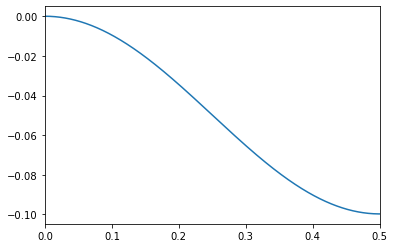

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython import display

numberofperiods = 5
alphaGeoAmp = 12.67
alphaPlungeAmp = (30-12.67)
period = 3.801279221
chord = 0.0762
resolution = 1963496


#outputfile
outputfilename = os.getcwd()
outputfilename += '/pitchplunge27dec.dat'

#time
time = np.linspace(0,period*numberofperiods,resolution)

#linear displacement
linearDisplacement = pd.DataFrame(data=time,columns={'Time'})
linearDisplacement['X'] = 0
linearDisplacement['Y'] = -0.04987318726 + 0.04987318726*np.sin((time/period)*2*np.pi+np.pi/2)
linearDisplacement['Z'] = 0

#rotational displacement
rotationalDisplacement = pd.DataFrame(data=time,columns={'Time'})
rotationalDisplacement['phi'] = 0
rotationalDisplacement['psi'] = 0
rotationalDisplacement['theta'] = -alphaGeoAmp * np.sin((time/period)*2*np.pi)


plt.plot(linearDisplacement['Time']/period, linearDisplacement['Y'])
plt.xlim(0,0.5)
#plt.xlim(0,0.5)

#saving motion file

f= open(outputfilename,"w+")

f.write(str(resolution) + '\n(\n')

for i in range(0,resolution,1):
    
    line = '('
    line += str(linearDisplacement['Time'].iloc[i])
    line += '(('
    line += str(linearDisplacement['X'].iloc[i])
    line += ' '
    line += str(linearDisplacement['Y'].iloc[i])
    line += ' '
    line += str(linearDisplacement['Z'].iloc[i])
    line += ')('
    line += str(rotationalDisplacement['phi'].iloc[i])
    line += ' '
    line += str(rotationalDisplacement['psi'].iloc[i])
    line += ' '
    line += str(rotationalDisplacement['theta'].iloc[i])
    line += ')))\n'
    
    f.write(line)
    
    if i%1000==0:
        print('Completing save ',round(i/resolution*100,2), '%')
        display.clear_output(wait=True)
            
f.write(')')


In [4]:
i = 5
linearDisplacement['Time'].iloc[i]

4.8399400316782065e-05

(0.0, 0.5)

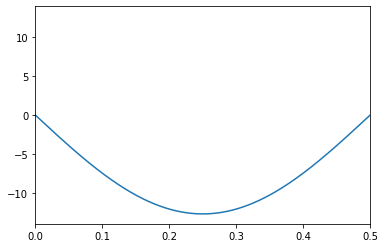

In [5]:
plt.plot(rotationalDisplacement['Time']/period,rotationalDisplacement['theta'])
plt.xlim(0,0.5)
#plt.xlim(0,0.5)
